In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

In [4]:
data = pd.read_csv('../data/preprocessed.csv',parse_dates=True)
data['time'] = data['time'].apply(datetime.datetime.fromisoformat)

In [5]:
data['energy_lag'] = data['energy'].shift(1).fillna(0)

In [6]:
data['energy_difference'] = data['energy'] - data['energy_lag'] 

In [7]:
#removing first row since it is not possible to have non-comulative data for this row
data = data[1:]

In [8]:
def get_month(datetime_obj):
    return datetime_obj.month

Plotting the first 2 weeks of energy data as timeseries

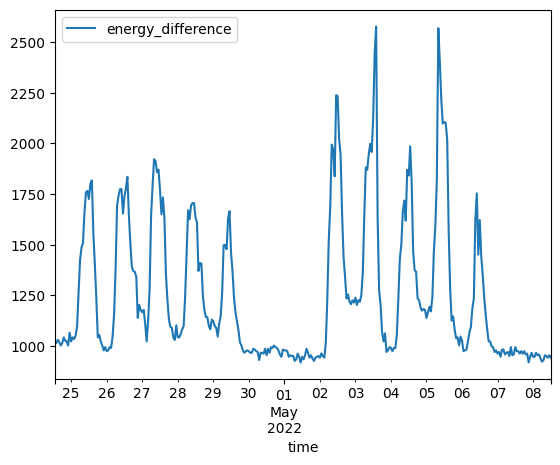

In [10]:
#First two weeks of data
two_weeks_df = data[data['time']< (data['time'].iloc[0] + datetime.timedelta(weeks=2)) ]
fig = two_weeks_df.plot(x='time',y=['energy_difference'])
plt.savefig('../plots/first_2_weeks_energy.png')

Plotting random 2 weeks of data

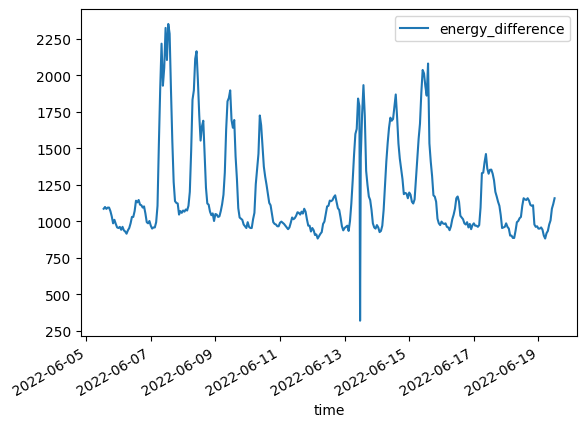

In [11]:
#plotting random 2 weeks of data
week_number = 6
two_weeks_df = data[(data['time'] >= (data['time'].iloc[0] + datetime.timedelta(weeks=week_number))) &  (data['time'] < (data['time'].iloc[0] + datetime.timedelta(weeks=week_number+2)))]
two_weeks_df.plot(x='time',y=['energy_difference'])
plt.savefig('../plots/random_2_weeks_energy.png')

,time,energy,glob_irrad_in_diffuse,glob_irrad_total_disc,dew_point,enth,rel_hum,temp,energy_lag,energy_difference
1186,2022-06-13 00:00:00,7707936,NaN,NaN,NaN,NaN,53.2,17.350000,7706981.0,955.0
1187,2022-06-13 01:00:00,7708899,NaN,NaN,8.200000,NaN,57.2,16.650000,7707936.0,963.0
1188,2022-06-13 02:00:00,7709870,NaN,NaN,8.700000,33.400000,61.2,16.000000,7708899.0,971.0
1189,2022-06-13 03:00:00,7710805,9.384720,9.384720,9.050000,34.400000,NaN,16.100000,7709870.0,935.0
1190,2022-06-13 04:00:00,7711808,35.965732,35.965732,10.628571,37.400000,66.2,17.450000,7710805.0,1003.0
1191,2022-06-13 05:00:00,7712931,68.943536,68.943536,12.488889,41.566667,NaN,18.600000,7711808.0,1123.0
1192,2022-06-13 06:00:00,7714210,85.670210,85.670210,14.500000,46.983333,NaN,20.628571,7712931.0,1279.0
1193,2022-06-13 07:00:00,7715664,201.762327,201.762327,17.188889,55.358333,64.2,23.946154,7714210.0,1454.0
1194,2022-06-13 08:00:00,7717263,279.356679,279.356679,16.114286,54.840000,59.2,24.420000,7715664.0,1599.0
1195,2022-06-13 09:00:00,7718897,306.851424,306.851424,15.033333,51.800000,55.2,24.780000,7717263.0,1634.0


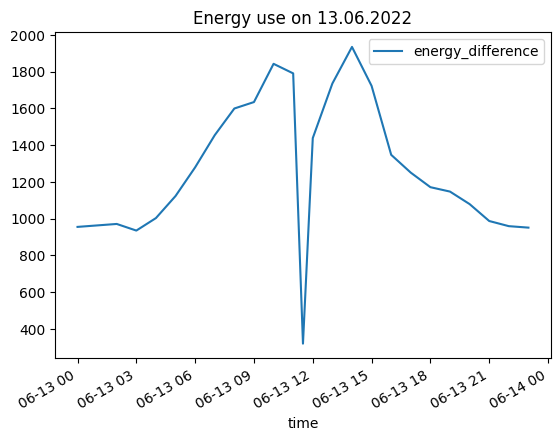

In [19]:
to_plot = data[(data['time'] >=  datetime.datetime(year=2022,month=6,day=13)) &  (data['time'] < (datetime.datetime(year=2022,month=6,day=14)))]
display(to_plot)
to_plot.plot(x='time',y=['energy_difference'])
plt.title("Energy use on 13.06.2022")
plt.savefig('../plots/energy_use_drop_13-06-2022.png')